In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("resnet34_3d_seg-round-2.csv")
df

,epoch,lr,loss_train,loss_val,fbeta_0.20,fbeta_0.25,fbeta_0.30,fbeta_0.35,fbeta_0.40,fbeta_0.45,...,fbeta_0.55,fbeta_0.60,fbeta_0.65,fbeta_0.70,fbeta_0.75,fbeta_0.80,fbeta_0.85,fbeta_0.90,fbeta_0.95,accuracy
0,1,4.000000e-06,0.143293,0.097215,0.103922,0.107861,0.122198,0.134657,0.152276,0.146334,...,0.006158,0.000091,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.905076
1,2,5.203460e-06,0.121024,0.079160,0.147067,0.152677,0.156980,0.161913,0.184267,0.207344,...,0.000749,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.917040
2,3,8.753494e-06,0.112821,0.088999,0.121891,0.142011,0.155900,0.161368,0.171064,0.199201,...,0.002243,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.909321
3,4,1.447209e-05,0.105608,0.082003,0.150881,0.156664,0.160019,0.164548,0.179755,0.213629,...,0.003531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.911565
4,5,2.207249e-05,0.105394,0.078077,0.149416,0.155748,0.160482,0.170962,0.194571,0.224234,...,0.001716,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.908347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,2.168596e-07,0.044864,0.054255,0.293656,0.350310,0.401216,0.451998,0.494376,0.531341,...,0.590177,0.603864,0.595197,0.548429,0.443591,0.266842,0.070973,0.000994,0.0,0.931403
146,147,1.221970e-07,0.042623,0.055371,0.285717,0.342231,0.391762,0.437195,0.476344,0.510703,...,0.575152,0.595153,0.597320,0.559199,0.466106,0.306599,0.097493,0.002066,0.0,0.928197
147,148,5.454422e-08,0.044245,0.054731,0.301355,0.360532,0.411129,0.457065,0.496216,0.532943,...,0.590531,0.604896,0.590667,0.538936,0.435966,0.264508,0.070236,0.000221,0.0,0.932142
148,149,1.393789e-08,0.042136,0.055355,0.288706,0.346127,0.394783,0.438751,0.478998,0.514129,...,0.574936,0.596582,0.597312,0.559280,0.466243,0.308421,0.100140,0.002066,0.0,0.928597


(0.3, 0.6)

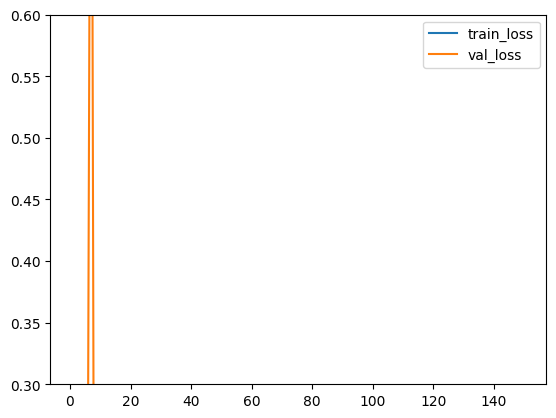

In [2]:
plt.plot(df["epoch"], df["loss_train"], label="train_loss")
plt.plot(df["epoch"], df["loss_val"], label="val_loss")
# plot the moving average of the validation loss
# plt.plot(df["epoch"], df["loss_train"].rolling(2).mean(), label="val_loss")

plt.legend()
plt.ylim(0.3, 0.6)

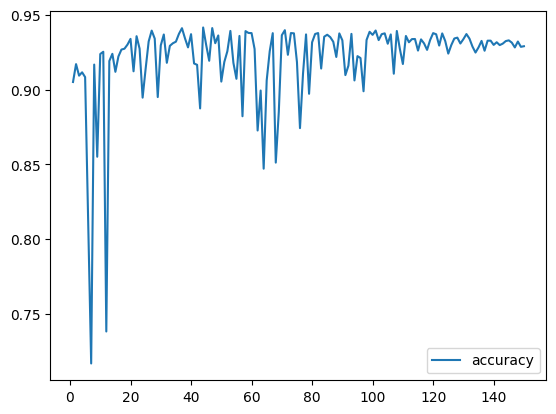

In [3]:
plt.plot(df["epoch"], df["accuracy"], label="accuracy")

plt.legend()
# plt.ylim(0.3, 0.6)

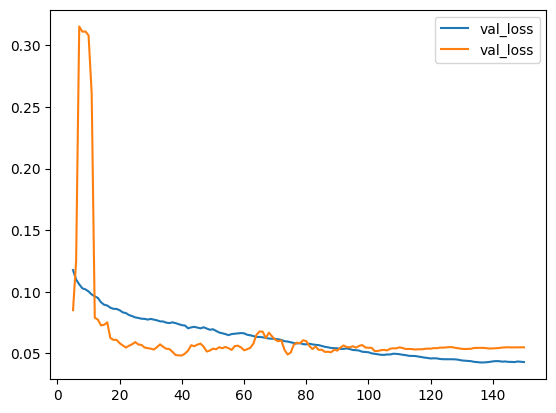

In [4]:
plt.plot(df["epoch"], df["loss_train"].rolling(5).mean(), label="val_loss")
plt.plot(df["epoch"], df["loss_val"].rolling(5).mean(), label="val_loss")

plt.legend()
# plt.ylim(0.05, 0.3)

(150, 16)


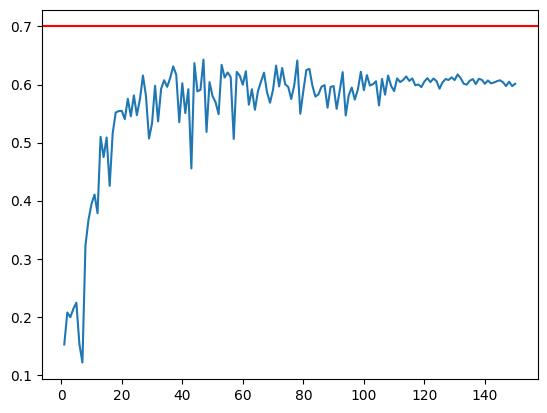

In [5]:
# take columns that start with "fbeta_"
df_fbeta = df.filter(regex=("fbeta_.*")).values
print(df_fbeta.shape)
df_fbeta = np.max(df_fbeta, axis=1)
plt.plot(df["epoch"], df_fbeta, label="fbeta_max")

# put horizontal line at 0.55
plt.axhline(y=0.7, color='r', linestyle='-')


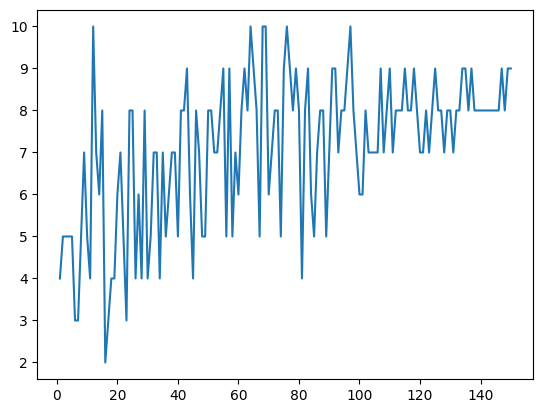

In [6]:
# take columns that start with "fbeta_"
df_fbeta = df.filter(regex=("fbeta_.*")).values
df_fbeta = np.argmax(df_fbeta, axis=1)
df_fbeta.shape
plt.plot(df["epoch"], df_fbeta, label="fbeta_max")